In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:

model.fit(X, y)
#Hint: .fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.496708801663114

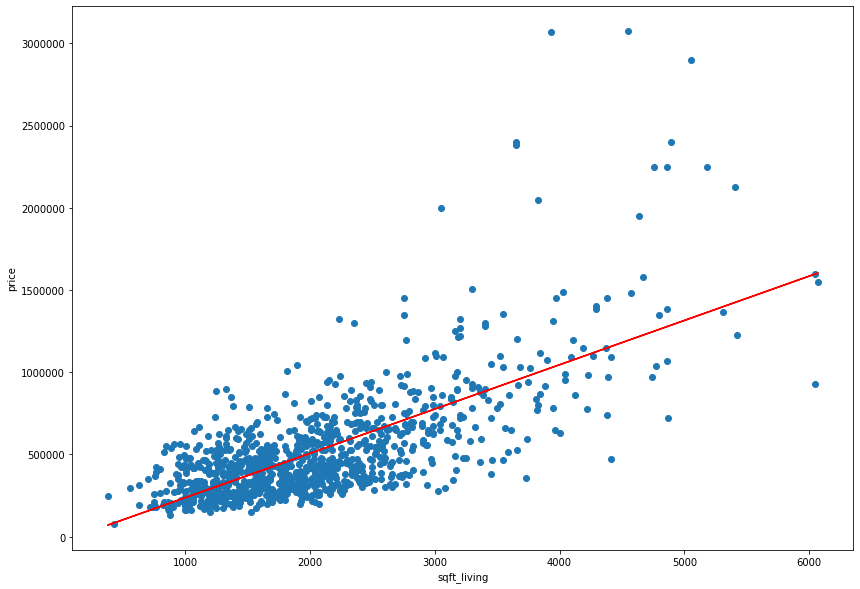

In [3]:
#b)

#Your code:
plt.figure(figsize = (14,10))
plt.scatter(X, y)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.plot(X, model.predict(X), c = "red")

model.intercept_
model.coef_
model.score(X, y)

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

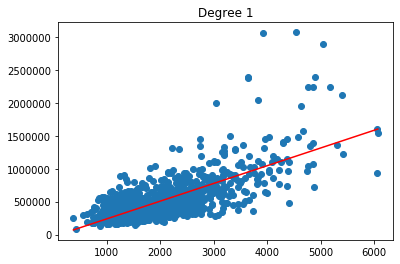

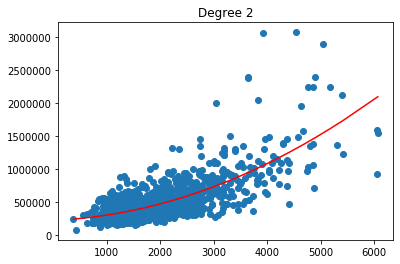

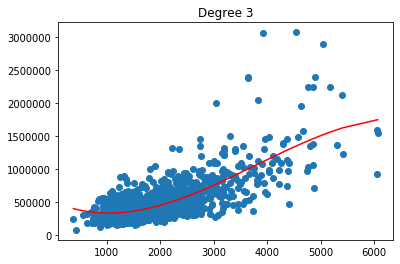

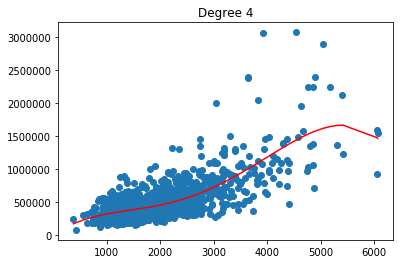

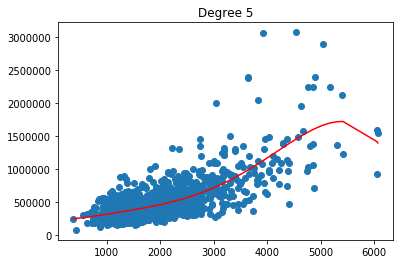

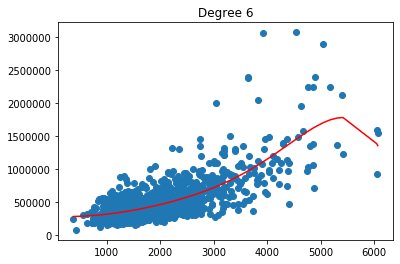

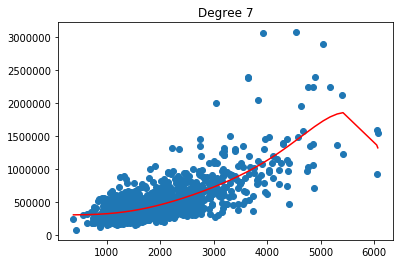

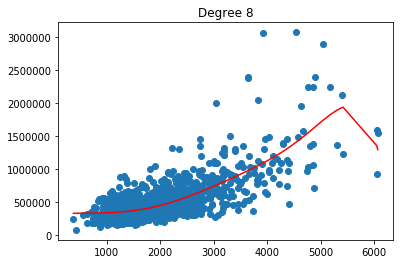

In [4]:
#c)
errors = []

for degree in range(1,9):
    
    poly = PolynomialFeatures(degree, include_bias = False)
    X_degree = poly.fit_transform(X)

        #Your code:
    model_pr = LinearRegression()
    model_pr.fit(X_degree, y)
    y_degree_predict = model_pr.predict(X_degree)
    
    sorted_data = sorted(list(zip(X, y_degree_predict)), key=lambda x: x[0])
    x_degree_plot = [pair[0] for pair in sorted_data]
    y_degree_predict_plot = [pair[1] for pair in sorted_data]
    errors.append(mean_squared_error(y, y_degree_predict))

    plt.scatter(X, y)
    plt.plot(x_degree_plot, y_degree_predict_plot, c = "red")
    plt.title("Degree " + str(degree))
    plt.show()

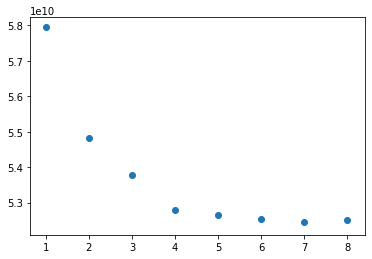

In [5]:
#Your code:

for degree in range(1, 9):
    plt.scatter(degree, errors[degree - 1],c = "tab:blue")
    plt.show

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

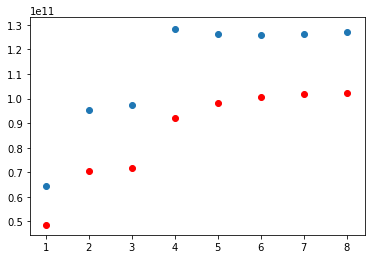

In [6]:
#a)

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X_degree, y, test_size=0.3, random_state=44)
    
errors_train = []
errors_test = []

for degree in range(1,9):
    
    poly = PolynomialFeatures(degree, include_bias = False)
    X_degree_train = poly.fit_transform(X_train)
    X_degree_test = poly.fit_transform(X_test)

    #Your code:
    model_pr = LinearRegression()
    model_pr.fit(X_degree_train, y_train)
    y_degree_train_pred = model_pr.predict(X_degree_train)
    y_degree_test_pred = model_pr.predict(X_degree_test)
    errors_train.append(mean_squared_error(y_train, y_degree_train_pred))
    errors_test.append(mean_squared_error(y_test, y_degree_test_pred))
    
    plt.scatter(degree, errors_train[degree - 1], c = "red")
    plt.scatter(degree, errors_test[degree - 1], c = "tab:blue")


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Error = 396407.1889615158


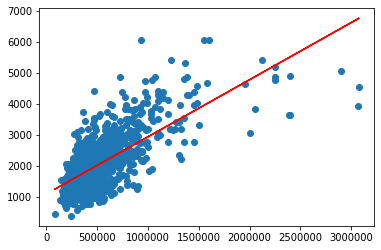

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

lr_model = LinearRegression()
lr_model.fit(X, y)
y_pred = lr_model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c = "red")

print("Error = {0}".format(mean_squared_error(y, y_pred)))

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749581797.04599


In [9]:
X = house_df[["sqft_living", "grade", "bathrooms", "sqft_living15"]].values.reshape(-1, 4)
y = house_df.price.values.reshape(-1)

th_nom = PolynomialFeatures(3, include_bias = False)
X = th_nom.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)

model_pr = LinearRegression()
model_pr.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 2.2057068444836994e+22
